<a href="https://colab.research.google.com/github/RAFIKSHA/XST_Extracting_Statewize_Data/blob/main/Extracting_statewize_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
url = "https://raw.githubusercontent.com/xscientisttech/detaset/main/india-state-wise-data-analysis.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataframe
data.head()


,State & District,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,"district_code:1, state_name:JAMMU AND KASHMIR,...",870354,474190,396164,439654,282823,156831,1048,1046,2,...,74948,39709,21751,6402,405015,289765,694780,600759,178435,89679
1,"district_code:2, state_name:JAMMU AND KASHMIR,...",753745,398041,355704,335649,207741,127908,368,343,25,...,66459,41367,27950,6857,374972,342646,717618,503223,160933,88978
2,"district_code:3, state_name:JAMMU AND KASHMIR,...",133487,78971,54516,93770,62834,30936,488,444,44,...,16265,8923,6197,575,75493,32637,108130,70703,41515,21019
3,"district_code:4, state_name:JAMMU AND KASHMIR,...",140802,77785,63017,86236,56301,29935,18,12,6,...,16938,9826,3077,408,82938,39854,122792,87532,35561,17488
4,"district_code:5, state_name:JAMMU AND KASHMIR,...",476835,251899,224936,261724,163333,98391,556,406,150,...,46062,29517,13962,1884,288430,164044,452474,304979,109818,61334


# Data Preperation

In [ ]:
from tables.table import Column
# Preprocess data
def preprocess_data(df):
    # Split combined data in the 'state & district' column
    #df[['district_code','state_name', 'district_name']] = df['State & District'].str.split(",", expand=True)
    lst = df['State & District'].str.split(",", expand=True)
    #print("List: ", lst)
    df.drop(columns=['State & District'], inplace=True)

    df.insert(0,column = "District_Code", value= lst[0].str.replace("district_code:",""))
    df.insert(1,column = "State_Name", value= lst[1].str.replace("state_name:",""))
    df.insert(2,column = "District_Name", value= lst[2].str.replace("district_name:",""))

    return df

# Preprocess the data
preprocessed_set= preprocess_data(data.copy())

# Displaying preprocessed data
print("Preprocessed Data is:")
preprocessed_set.head()

Preprocessed Data is:


,District_Code,State_Name,District_Name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Secondary_Education,Higher_Education,Graduate_Education,Other_Education,Literate_Education,Illiterate_Education,Total_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,74948,39709,21751,6402,405015,289765,694780,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,66459,41367,27950,6857,374972,342646,717618,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,16265,8923,6197,575,75493,32637,108130,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,16938,9826,3077,408,82938,39854,122792,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,46062,29517,13962,1884,288430,164044,452474,304979,109818,61334




```
# This is formatted as code
```

# Data Visualization

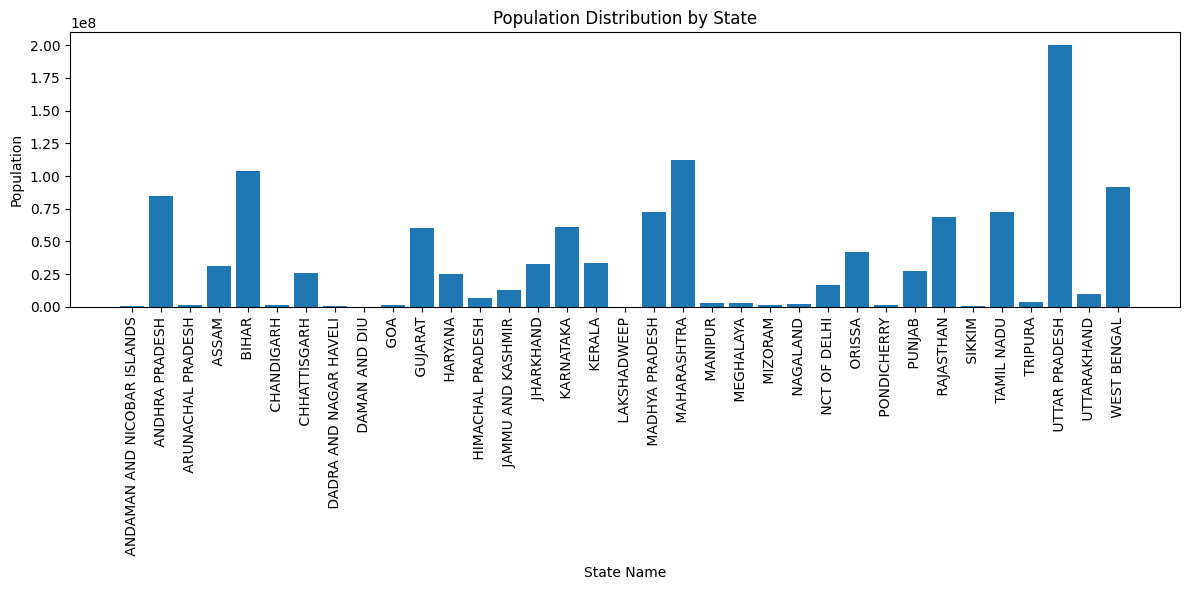

In [ ]:
# Group the data by state name and calculate the total population for each state

state_population = preprocessed_set.groupby('State_Name')['Population'].sum().reset_index()

# Create a bar graph for population distribution
plt.figure(figsize=(12, 6))
plt.bar(state_population['State_Name'], state_population['Population'])
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Population')
plt.title('Population Distribution by State')
plt.tight_layout()
plt.show()



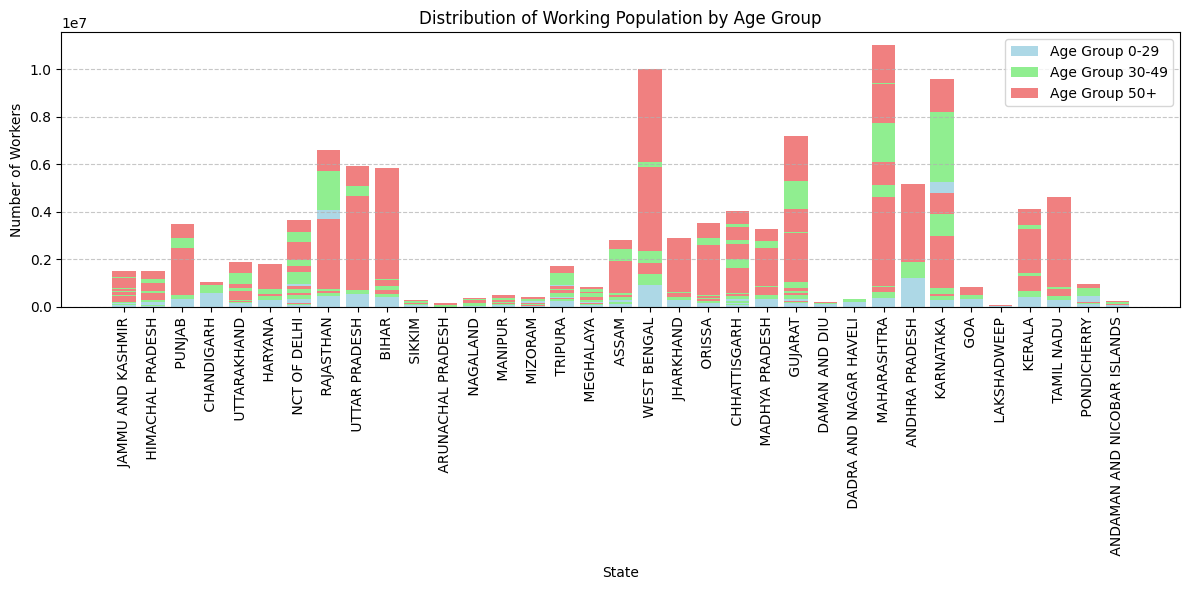

In [ ]:
# Create a stacked bar chart to visualize the distribution of the working population by age group
plt.figure(figsize=(12, 6))
plt.bar(preprocessed_set['State_Name'], preprocessed_set['Age_Group_0_29'], label='Age Group 0-29', color='lightblue')
plt.bar(preprocessed_set['State_Name'], preprocessed_set['Age_Group_30_49'], label='Age Group 30-49', color='lightgreen', bottom=preprocessed_set['Age_Group_0_29'])
plt.bar(preprocessed_set['State_Name'], preprocessed_set['Age_Group_50'], label='Age Group 50+', color='lightcoral',
        bottom=preprocessed_set['Age_Group_0_29'] + preprocessed_set['Age_Group_30_49'])
plt.xlabel('State')
plt.ylabel('Number of Workers')
plt.title('Distribution of Working Population by Age Group')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


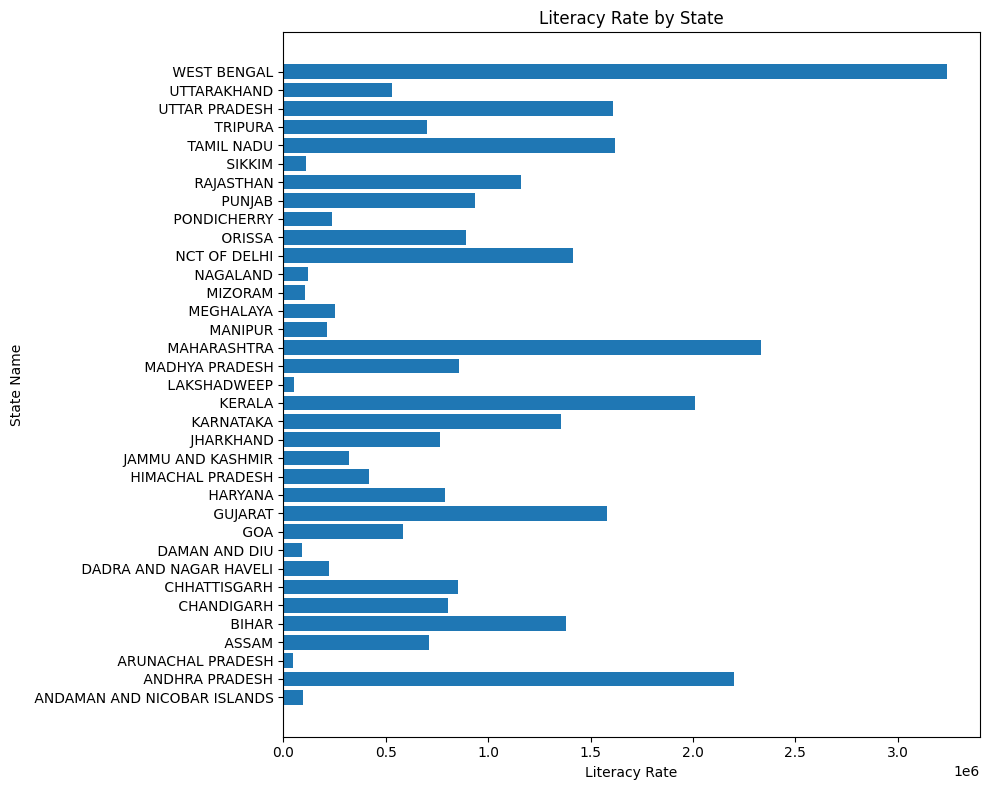

In [ ]:
# Group the data by state name and calculate the average literacy rate for each state

state_literacy = preprocessed_set.groupby('State_Name')['Literate'].mean().reset_index()

# Create a horizontal bar graph for literacy rate distribution
plt.figure(figsize=(10, 8))
plt.barh(state_literacy['State_Name'], state_literacy['Literate'])
plt.xlabel('Literacy Rate')
plt.ylabel('State Name')
plt.title('Literacy Rate by State')
plt.tight_layout()
plt.show()


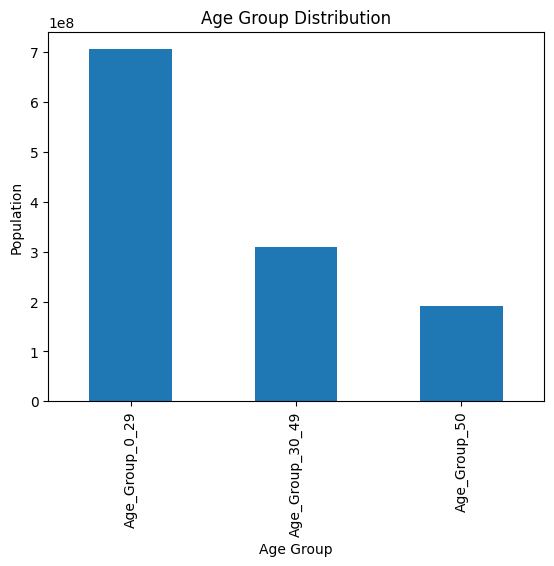

In [ ]:
 # Age Group Distribution (assuming you have columns for age groups)
age_groups = ['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']
age_group_distribution = data[age_groups].sum()
age_group_distribution.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Age Group Distribution')
plt.show()


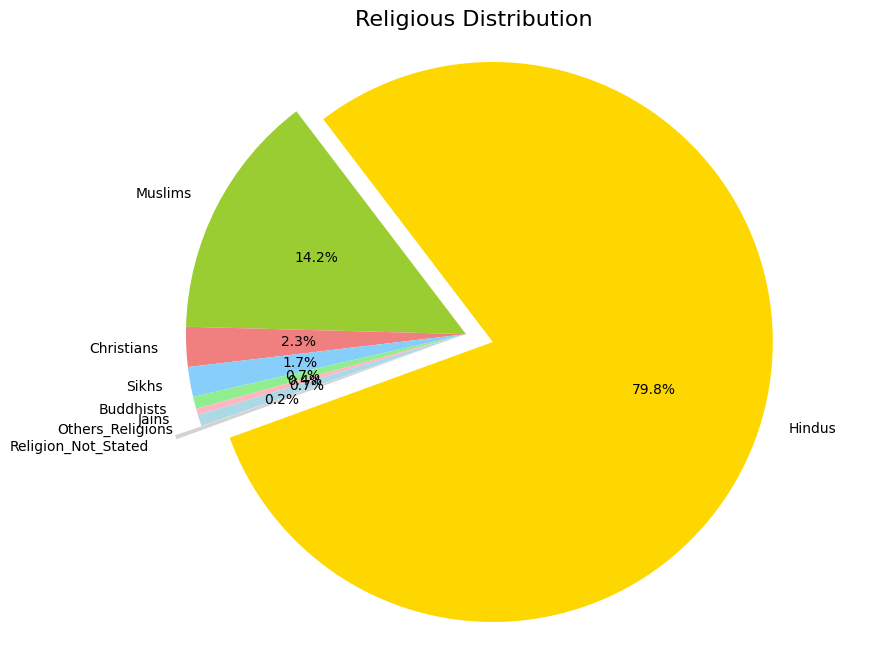

In [ ]:


# Define the religions and their corresponding columns
religions = ['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains', 'Others_Religions', 'Religion_Not_Stated']

# Calculate the sum of each religion's population
religion_distribution = data[religions].sum()

# Create a list of colors for the pie chart slices
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightblue', 'lightgray']

# Explode the pie slices (separate some slices from the center)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)

# Create the pie chart with improved settings
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.pie(religion_distribution, labels=religion_distribution.index, autopct='%1.1f%%', colors=colors, startangle=200, explode=explode)

# Increase the label font size
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Religious Distribution', fontsize=16)
plt.show()


Question 1: What is the population of each state?


                      State_Name  Population
0    ANDAMAN AND NICOBAR ISLANDS      380581
1                 ANDHRA PRADESH    84580777
2              ARUNACHAL PRADESH     1383727
3                          ASSAM    31205576
4                          BIHAR   104099452
5                     CHANDIGARH     1055450
6                   CHHATTISGARH    25545198
7         DADRA AND NAGAR HAVELI      343709
8                  DAMAN AND DIU      243247
9                            GOA     1458545
10                       GUJARAT    60439692
11                       HARYANA    25351462
12              HIMACHAL PRADESH     6864602
13             JAMMU AND KASHMIR    12541302
14                     JHARKHAND    32988134
15                     KARNATAKA    61095297
16                        KERALA    33406061
17                   LAKSHADWEEP       64473
18                MADHYA PRADESH    72626809
19                   MAHARASHTRA   112374333
20                       MANIPUR     2855794
21        

Average Literacy Rate: 1193185.64
Question 3: What is the distribution of workers by gender?


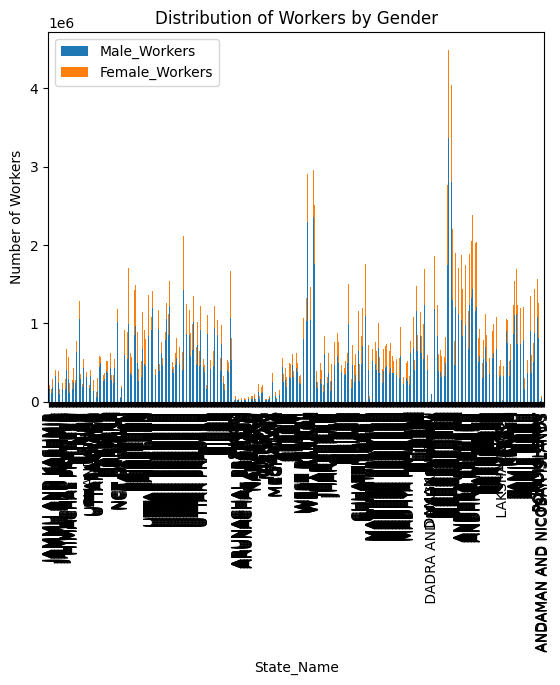

Total Workers: 481888868
Question 4: What is the religious composition in the dataset?
Visualization not available for this question.
Answer not available for this question.
Question 5: What is the education level in different age groups?
Visualization not available for this question.
Answer not available for this question.
Question 6: How many households have access to the internet?
Visualization not available for this question.
Answer not available for this question.
Question 7: What is the distribution of religions in urban areas?
Visualization not available for this question.
Answer not available for this question.
Question 8: How many households use LPG or PNG as fuel?
Visualization not available for this question.
Answer not available for this question.
Question 9: What is the distribution of agricultural workers by state?


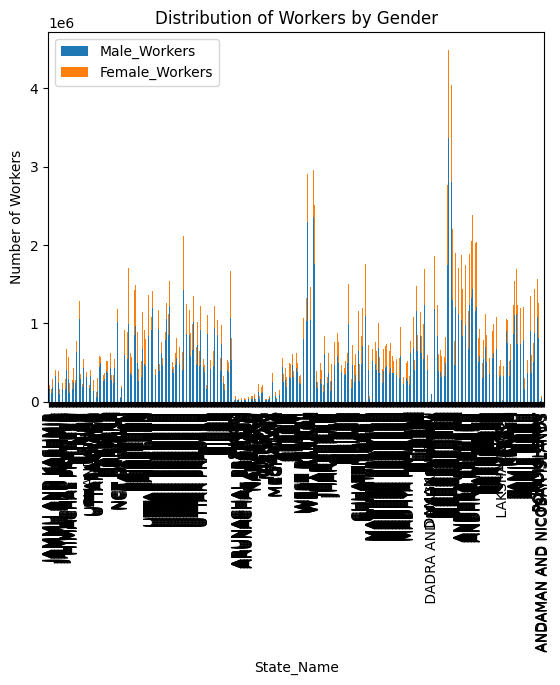

Total Workers: 481888868
Question 10: What is the gender distribution in different education levels?
Visualization not available for this question.
Answer not available for this question.


In [ ]:
# Generate questions
import plotly.express as px
questions = [
    "What is the population of each state?",
    "How does the literacy rate vary across states?",
    "What is the distribution of workers by gender?",
    "What is the religious composition in the dataset?",
    "What is the education level in different age groups?",
    "How many households have access to the internet?",
    "What is the distribution of religions in urban areas?",
    "How many households use LPG or PNG as fuel?",
    "What is the distribution of agricultural workers by state?",
    "What is the gender distribution in different education levels?"
]

# Visualizations and answers for the questions
for i, question in enumerate(questions):
    print(f"Question {i + 1}: {question}")

    # Create visualizations based on the questions
    if "population" in question.lower():
        # Visualization: Population distribution by state
        fig = px.bar(preprocessed_set, x='State_Name', y='Population', title='Population Distribution by State')
        fig.show()

    elif "literacy rate" in question.lower():
        # Visualization: Literacy rate variation across states
        fig = px.bar(preprocessed_set, x='State_Name', y='Literate', title='Literacy Rate by State')
        fig.show()

    elif "workers" in question.lower():
        # Visualization: Distribution of workers by gender
        df_gender_workers = preprocessed_set[['State_Name', 'Male_Workers', 'Female_Workers']]
        df_gender_workers.set_index('State_Name').plot(kind='bar', stacked=True, title='Distribution of Workers by Gender')
        plt.ylabel('Number of Workers')
        plt.show()

    # Add more conditions for other questions and visualizations

    else:
        print("Visualization not available for this question.")

    # Provide answers if available in the dataset
    if "population" in question.lower():
        # Calculate the total population for each state
        population_by_state = preprocessed_set.groupby('State_Name')['Population'].sum().reset_index()
        print(population_by_state)

    elif "literacy rate" in question.lower():
        # Calculate the average literacy rate
        average_literacy_rate =preprocessed_set['Literate'].mean()
        print(f"Average Literacy Rate: {average_literacy_rate:.2f}")

    elif "workers" in question.lower():
        # Calculate the total number of workers
        total_workers = preprocessed_set[['Male_Workers', 'Female_Workers']].sum().sum()
        print(f"Total Workers: {total_workers}")

    # Add more conditions for other questions and answers
    else:
        print("Answer not available for this question.")
